# Computer Vision and Scene Analysis

## Practical Assignment 2

### 1. Image Smoothing

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

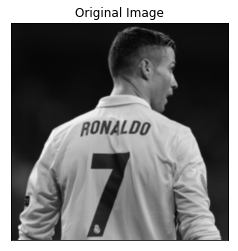

In [43]:
#Reading the image
img = cv2.imread(r'C:\Users\Sonit Samal\Desktop\source.jpg',0)

plt.imshow(img,cmap= 'gray',interpolation = 'bicubic')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.show()

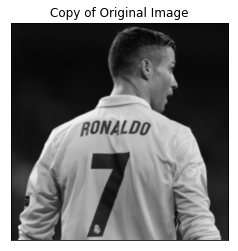

In [44]:
#Copying the source image
img_copy = img.copy()

plt.imshow(img,cmap= 'gray',interpolation = 'bicubic')
plt.title('Copy of Original Image')
plt.xticks([]),plt.yticks([])
plt.show()

In [45]:
#Image Smoothing Function
def create_kernel():
    dimension = int(input("Enter the kernel size: "))
    return dimension

def smooth_image(image_name):
    height, width = img.shape[:2]
    dimension = create_kernel()
    
    smoothed_image = image_name.copy()
    
    for i in range(height - (dimension-1)):
        for j in range(width- (dimension-1)):
            smoothed_image[i+int(dimension/2),j+int(dimension/2)] = np.mean(smoothed_image[i:i+dimension,j:j+dimension])
    return smoothed_image

Enter the kernel size: 5


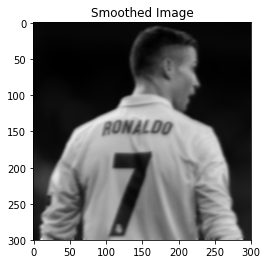

In [46]:
smooth = smooth_image(img)

#Display the smooth
plt.imshow(smooth,cmap = 'gray',interpolation = 'bicubic')
plt.title('Smoothed Image')
plt.show()

### 2. Edge Detection

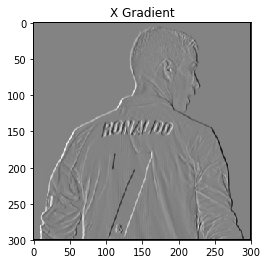

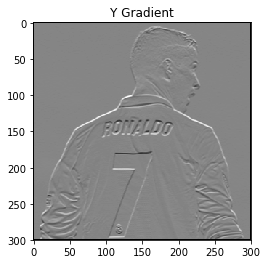

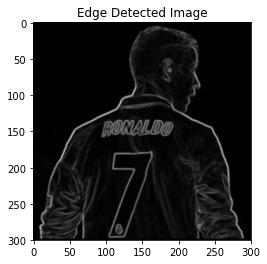

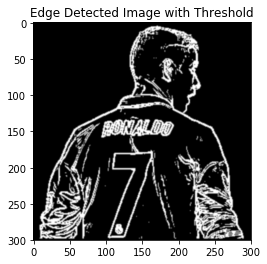

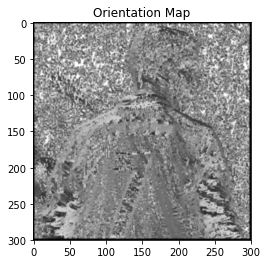

In [48]:
import math
#Edge Detection using sobel filter

sobel_x = [[-1,0,1],[-2,0,2],[-1,0,1]]
sobel_y = [[-1,-2,-1],[0,0,0],[1,2,1]]

edge_image = img.copy()

height,width = img.shape[:2]

Gx = np.zeros((len(img),len(img[0])))
Gy = np.zeros((len(img),len(img[0])))
Edge_Image = np.zeros((len(img),len(img[0])))
Threshold_Edge_Image = np.zeros((len(img),len(img[0])))
Orientation_Image = np.zeros((len(img),len(img[0])))

for i in range(2,height-2):
    for j in range(2,width-2):
        window = edge_image[i-1:i+2,j-1:j+2]
        gx = np.sum(np.multiply(window,sobel_x))
        gy = np.sum(np.multiply(window,sobel_y))
        Gx[i][j] = gx
        Gy[i][j] = gy
        Edge_Image[i][j] = int(math.sqrt(gx**2 + gy**2))
        
        #For Populating the Orientation Map
        if(Gx[i][j] == 0):
            Orientation_Image[i][j] = 255
        else:
            Orientation_Image[i][j] = int(math.degrees(math.atan(Gy[i][j]/Gx[i][j])) + 90 * 255/180)
                    


for i in range(1,len(Gx)-1):
    for j in range(1,len(Gy)-1):
        Gx[i][j] = int((Gx[i][j] + 1020) * 255/2040)
        Gy[i][j] = int((Gy[i][j] + 1020) * 255/2040)
        
plt.imshow(Gx,cmap = 'gray')
plt.title('X Gradient')
plt.show()

plt.imshow(Gy,cmap='gray')
plt.title('Y Gradient')
plt.show()

plt.imshow(Edge_Image, cmap = 'gray', interpolation = 'bicubic')
plt.title('Edge Detected Image')
plt.show()

for i in range(height):
    for j in range(width):
        if(Edge_Image[i,j] > 100):
            Threshold_Edge_Image[i,j] = 255
        else:
            Threshold_Edge_Image[i,j] = 0

plt.imshow(Threshold_Edge_Image, cmap = 'gray', interpolation = 'bicubic')
plt.title('Edge Detected Image with Threshold')
plt.show()


plt.imshow(Orientation_Image, cmap = 'gray', interpolation = 'bicubic')
plt.title('Orientation Map')
plt.show()


## 3. TEMPLATE MATCHING

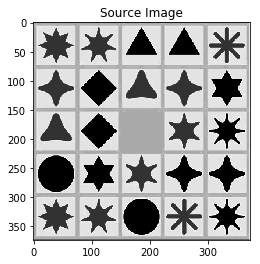

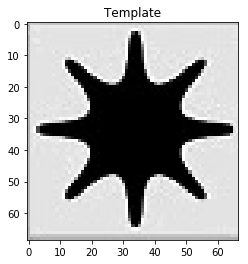

In [49]:
source = cv2.imread(r'C:\Users\Sonit Samal\Desktop\shapes-bw.jpg',0)
template = cv2.imread(r'C:\Users\Sonit Samal\Desktop\template.jpg',0)

source_copy = source.copy()

plt.imshow(source,cmap='gray')
plt.title('Source Image')
plt.show()

plt.imshow(template,cmap = 'gray')
plt.title('Template')
plt.show()

In [50]:
# For Producing the correlation Matrix
height, width = template.shape[:2]
CorrMat = np.zeros((source.shape[0]-height,source.shape[1]-width))
temp_modify = np.subtract(template,np.mean(template))

for i in range(source.shape[0]-height):
    for j in range(source.shape[1]-width):
        window = source[i:i+height,j:j+width]
        window_modified = np.subtract(window,np.mean(window))
        Mul = np.multiply(window_modified,temp_modify)
        Sum = Mul.sum()
        Div = np.divide(Sum,(math.pow(np.sum(np.square(window_modified)), 0.5)*math.pow(np.sum(np.square(temp_modify)),0.5)))
        CorrMat[i][j] = Div

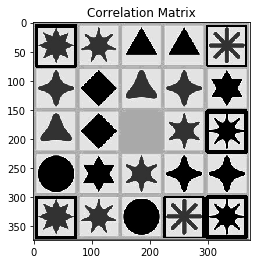

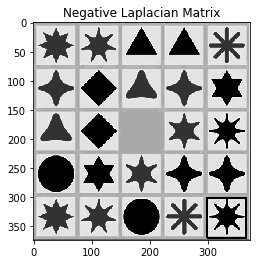

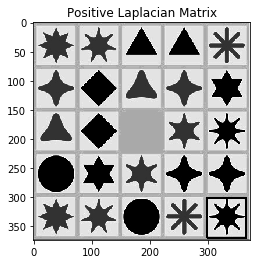

In [51]:
#Thresholding to underline the Detection
threshold = 0.8

loc = np.where(CorrMat >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(source_copy, pt, (pt[0]+width, pt[1]+height),(0,255,255),2)

plt.imshow(source_copy,cmap='gray')
plt.title('Correlation Matrix')
plt.show()

#Applying the Laplacian filter to filter out the false positives and false negatives
pLMask = [[0,-1,0],[-1,4,-1],[0,-1,0]]
nLMask = [[0,1,0],[1,-4,1],[0,1,0]]

pos = np.zeros((CorrMat.shape[0],CorrMat.shape[1]))
neg = np.zeros((CorrMat.shape[0],CorrMat.shape[1]))

for i in range(1,CorrMat.shape[0]-1):
    for j in range(1, CorrMat.shape[1]-1):
        window = CorrMat[i-1:i+2,j-1:j+2]
        pos[i][j] = np.sum(np.multiply(window,pLMask))
        neg[i][j] = np.sum(np.multiply(window,nLMask))

temp = CorrMat.copy()
pImg = temp - pos
nImg = temp + neg

source_copy = source.copy()

loc = np.where(nImg >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(source_copy,pt,(pt[0]+width,pt[1]+height),(0,255,255),2)

plt.imshow(source_copy,cmap='gray')
plt.title('Negative Laplacian Matrix')
plt.show()

source_copy = source.copy()

loc = np.where(pImg >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(source_copy,pt,(pt[0]+width,pt[1]+height),(0,255,255),2)

plt.imshow(source_copy,cmap='gray')
plt.title('Positive Laplacian Matrix')
plt.show()

##### Template Matching is the process to find specfic objects in the image. This is done by convoluting the template image on the main image, and then finding a correlation matrix.

##### After obtaining the correaltion matrix, we apply a appropriate threshold to filter out the peaks which represent matched objects. These matched objects are highlighted in the resultant image.

##### Laplacian filter  is applied to improve the filter. This improves the overallobject detection, by eliminating the false positives